<a href="https://colab.research.google.com/github/iupui-soic/pybootcamp/blob/main/Raajitha_Chapter1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading Libraries and Dataset

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values

In [4]:
print(lifesat.to_string())

           Country  GDP per capita (USD)  Life satisfaction
0           Russia          26456.387938                5.8
1           Greece          27287.083401                5.4
2           Turkey          28384.987785                5.5
3           Latvia          29932.493910                5.9
4          Hungary          31007.768407                5.6
5         Portugal          32181.154537                5.4
6           Poland          32238.157259                6.1
7          Estonia          35638.421351                5.7
8            Spain          36215.447591                6.3
9         Slovenia          36547.738956                5.9
10       Lithuania          36732.034744                5.9
11          Israel          38341.307570                7.2
12           Italy          38992.148381                6.0
13  United Kingdom          41627.129269                6.8
14          France          42025.617373                6.5
15     New Zealand          42404.393738

In [5]:
lifesat.head()

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6


Plotting GDP Vs Life Satisfaction to understand the distribution

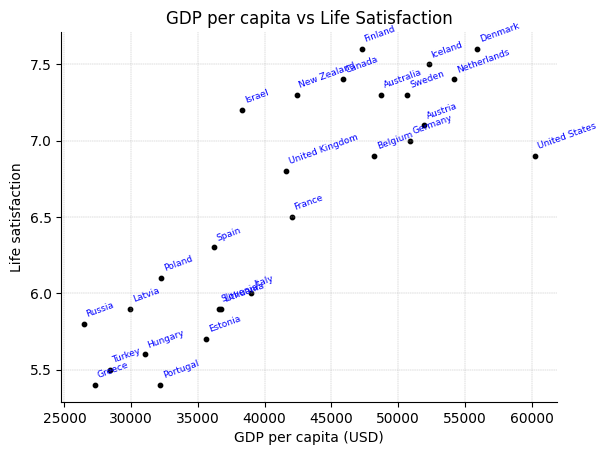

In [6]:
plt.scatter(lifesat['GDP per capita (USD)'], lifesat['Life satisfaction'], s=10, alpha=1, color="Black")
for i, row in lifesat.iterrows():
    plt.annotate(row['Country'], (row['GDP per capita (USD)'], row['Life satisfaction']),
                 xytext=(1, 5), textcoords='offset points', fontsize=6.5, color="Blue", rotation=20)

plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.title('GDP per capita vs Life Satisfaction')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.grid(True, linestyle='--', linewidth=0.3)
plt.show()

In [7]:
lifesat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               27 non-null     object 
 1   GDP per capita (USD)  27 non-null     float64
 2   Life satisfaction     27 non-null     float64
dtypes: float64(2), object(1)
memory usage: 776.0+ bytes


In order to predict the life statisfaction for country Cyprus using its GDP per capita $37,655

Training and running a Linear Reression model using Scikit-Learn

In [8]:
X = np.c_[lifesat["GDP per capita (USD)"]].reshape(-1, 1)
y = np.c_[lifesat["Life satisfaction"]].reshape(-1, 1)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

θ0=3.75, θ1=6.78e-05


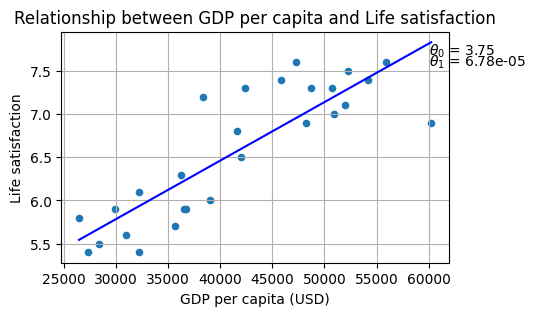

In [9]:
t0, t1 = model.intercept_[0], model.coef_[0][0]
print(f"θ0={t0:.2f}, θ1={t1:.2e}")

lifesat.plot(kind='scatter', figsize=(5, 3), grid=True, x="GDP per capita (USD)", y="Life satisfaction")

X = np.linspace(lifesat["GDP per capita (USD)"].min(), lifesat["GDP per capita (USD)"].max(), 1000)
Y = t0 + t1 * X
plt.plot(X, Y, "b")
plt.text(0.95, 0.9, f"$\\theta_0$ = {t0:.2f}", transform=plt.gca().transAxes, fontsize=10, ha='left', color="black")
plt.text(0.95, 0.85, f"$\\theta_1$ = {t1:.2e}", transform=plt.gca().transAxes, fontsize=10, ha='left', color="black")
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life satisfaction")
plt.title("Relationship between GDP per capita and Life satisfaction")
plt.show()


In [10]:
X_new = [[37_655.2]]
print(model.predict(X_new))

[[6.30165767]]


Training and running a KNN Regression model using Scikit-Learn

In [11]:
X = np.c_[lifesat["GDP per capita (USD)"]].reshape(-1, 1)
y = np.c_[lifesat["Life satisfaction"]].reshape(-1, 1)

from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=3)

model.fit(X, y)
X_new = [[37_655.2]]
print(model.predict(X_new))

[[6.33333333]]


We have predicted the life satisfaction of Cyprus to be 6.30 by linear regression model and 6.33 by KNN regression model.

# Main Challenges of Machine Learning
## Nonrepresentative Training Data

In [17]:
import urllib.request
from pathlib import Path
datapath = Path() / "datasets" / "lifesat"
datapath.mkdir(parents=True, exist_ok=True)
data_root = "https://github.com/ageron/data/raw/main/"
for filename in ("oecd_bli.csv", "gdp_per_capita.csv"):
    if not (datapath / filename).is_file():
        print("Downloading", filename)
        url = data_root + "lifesat/" + filename
        urllib.request.urlretrieve(url, datapath / filename)


In [18]:
oecd_bli = pd.read_csv(datapath / "oecd_bli.csv")
gdp_per_capita = pd.read_csv(datapath / "gdp_per_capita.csv")

In [21]:
print(full_country_stats.columns)

Index(['LOCATION', 'Country', 'INDICATOR', 'Indicator', 'MEASURE', 'Measure',
       'INEQUALITY', 'Inequality', 'Unit Code', 'Unit', 'PowerCode Code',
       'PowerCode', 'Reference Period Code', 'Reference Period', 'Value',
       'Flag Codes', 'Flags', 'Entity', 'Code', 'Year',
       'GDP per capita, PPP (constant 2017 international $)'],
      dtype='object')


In [23]:
gdp_year = 2020
gdppc_col = "GDP per capita (USD)"
lifesat_col = "Life satisfaction"

gdp_per_capita = gdp_per_capita[gdp_per_capita["Year"] == gdp_year]
gdp_per_capita = gdp_per_capita.drop(["Code", "Year"], axis=1)
gdp_per_capita.columns = ["Country", gdppc_col]
gdp_per_capita.set_index("Country", inplace=True)

gdp_per_capita.head()

,GDP per capita (USD)
Country,
Afghanistan,1978.961579
Africa Eastern and Southern,3387.594670
Africa Western and Central,4003.158913
Albania,13295.410885
Algeria,10681.679297


In [24]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

oecd_bli.head()

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3


In [28]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                              left_index=True, right_index=True)
full_country_stats.sort_values(by=gdppc_col, inplace=True)
full_country_stats = full_country_stats[[gdppc_col, lifesat_col]]

full_country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5


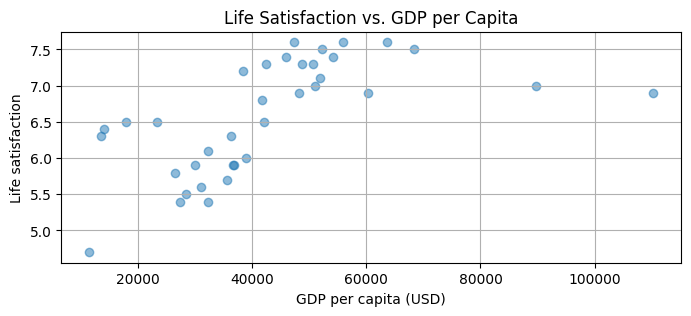

In [30]:
plt.figure(figsize=(8, 3))
plt.scatter(full_country_stats[gdppc_col], full_country_stats[lifesat_col], alpha=0.5)
plt.xlabel(gdppc_col)
plt.ylabel(lifesat_col)
plt.grid(True)
plt.title("Life Satisfaction vs. GDP per Capita")
plt.show()

In [51]:
X = np.c_[full_country_stats["GDP per capita (USD)"]].reshape(-1, 1)
y = np.c_[full_country_stats["Life satisfaction"]].reshape(-1, 1)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

θ0=5.58, θ1=2.33e-05


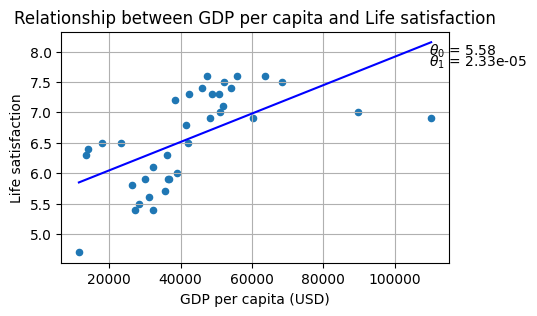

In [54]:
t0full, t1full = model.intercept_[0], model.coef_[0][0]
print(f"θ0={t0:.2f}, θ1={t1:.2e}")

full_country_stats.plot(kind='scatter', figsize=(5, 3), grid=True, x="GDP per capita (USD)", y="Life satisfaction")

X = np.linspace(full_country_stats["GDP per capita (USD)"].min(), full_country_stats["GDP per capita (USD)"].max(), 1000)
Y = t0 + t1 * X
plt.plot(X, Y, "b")
plt.text(0.95, 0.9, f"$\\theta_0$ = {t0:.2f}", transform=plt.gca().transAxes, fontsize=10, ha='left', color="black")
plt.text(0.95, 0.85, f"$\\theta_1$ = {t1:.2e}", transform=plt.gca().transAxes, fontsize=10, ha='left', color="black")
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life satisfaction")
plt.title("Relationship between GDP per capita and Life satisfaction")
plt.show()

In [34]:
X_new = [[37_655.2]]
print(model.predict(X_new))

[[6.45909437]]


The predcited value for Cyprus now is 6.45

## Overfitting the data

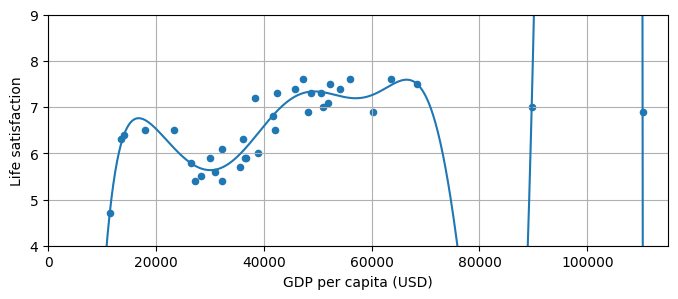

In [48]:
from sklearn import linear_model, preprocessing, pipeline

full_country_stats.plot(kind='scatter', figsize=(8, 3),
                        x=gdppc_col, y=lifesat_col, grid=True)

poly = preprocessing.PolynomialFeatures(degree=10, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([
    ('poly', poly),
    ('scal', scaler),
    ('lin', lin_reg2)])
pipeline_reg.fit(Xfull, yfull)
curve = pipeline_reg.predict(X)
plt.plot(X, curve)
min_life_sat = 4
max_life_sat = 9
plt.axis([0, 115_000, min_life_sat, max_life_sat])
plt.show()